<a href="https://colab.research.google.com/github/BryanPalacio/sales_predict/blob/main/sales_predict_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
filename = filename = '/content/drive/MyDrive/clases_data_science/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1) ¿Cuántas filas y columnas?

In [ ]:
df.shape
#hay 8523 filas y 12 columnas

(8523, 12)

2) ¿Cuáles son los tipos de datos en cada variable?

In [ ]:

df.info()
"""
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64

"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


'\n 0   Item_Identifier            8523 non-null   object \n 1   Item_Weight                7060 non-null   float64\n 2   Item_Fat_Content           8523 non-null   object \n 3   Item_Visibility            8523 non-null   float64\n 4   Item_Type                  8523 non-null   object \n 5   Item_MRP                   8523 non-null   float64\n 6   Outlet_Identifier          8523 non-null   object \n 7   Outlet_Establishment_Year  8523 non-null   int64  \n 8   Outlet_Size                6113 non-null   object \n 9   Outlet_Location_Type       8523 non-null   object \n 10  Outlet_Type                8523 non-null   object \n 11  Item_Outlet_Sales          8523 non-null   float64\n\n'

3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [ ]:
df.duplicated().sum()
#no hay

0

4) Identifiquen los valores faltantes.

In [ ]:
"""
faltan 1463 valores en Item_Weight    
faltan 2410 valores en Outlet_Size

"""
df.groupby(['Outlet_Establishment_Year']).sum()

""""
podemos encontrar una relacion entre los datos faltantes en la columna Item_Weight	
relacionados a la fecha de 1985 
""""


,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Outlet_Establishment_Year,,,,
1985,0.000,112.061805,204522.2570,3.633620e+06
1987,12121.730,55.879859,131809.0156,2.142664e+06
1997,11966.125,56.231875,132113.3698,2.118395e+06
1998,7166.800,56.308832,78131.5646,1.883402e+05
1999,12013.225,56.549156,130476.8598,2.183970e+06
2002,11751.840,56.180780,130942.7782,2.036725e+06
2004,11931.295,56.974873,133103.9070,2.268123e+06
2007,11877.495,56.834646,129103.9564,2.167465e+06
2009,11946.465,56.621454,131477.7724,1.851823e+06


5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

In [ ]:

"""
faltan 1463 valores en Item_Weight    
faltan 2410 valores en Outlet_Size


podemos encontrar una relacion entre los datos faltantes en la columna Item_Weight	
relacionados a la fecha de 1985 

"""
df.groupby(['Outlet_Establishment_Year']).sum()





,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Outlet_Establishment_Year,,,,
1985,0.000,112.061805,204522.2570,3.633620e+06
1987,12121.730,55.879859,131809.0156,2.142664e+06
1997,11966.125,56.231875,132113.3698,2.118395e+06
1998,7166.800,56.308832,78131.5646,1.883402e+05
1999,12013.225,56.549156,130476.8598,2.183970e+06
2002,11751.840,56.180780,130942.7782,2.036725e+06
2004,11931.295,56.974873,133103.9070,2.268123e+06
2007,11877.495,56.834646,129103.9564,2.167465e+06
2009,11946.465,56.621454,131477.7724,1.851823e+06


In [ ]:
#procedemos a calcumar la media del peso por producto

df.groupby(['Item_Type'])['Item_Weight'].mean()


Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [ ]:
#  se puede ver que las diferenciasa son muy pocas, asi que rellenaremos dichos datos faltantes 
#  con la media procederemos }a rellenar dichos datos faltantes
media_peso_producto = df['Item_Weight'].mean()
df['Item_Weight'].fillna(media_peso_producto, inplace=True)
df.isna().sum()


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#procederemos a eliminar la columna Outlet_Size ya que el tamano de la tienda no representaria 
#mucha diferencia en el momento de analizar las ventas ya que la mayoria esta entre mediana y grande
#caso contrario es la columna tipo de tienda la cual nos genera un dato mas relevante a la hora de tomar una desicion 
df = df.drop(columns='Outlet_Type')

6) Confirmen que no hay valores faltantes después de abordarlos.

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

In [12]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF', 'low fat'],'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'],'Regular')
df['Item_Fat_Content'].value_counts()



Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

 

In [ ]:
df["Item_Visibility"].describe().round(2)

count    8523.00
mean        0.07
std         0.05
min         0.00
25%         0.03
50%         0.05
75%         0.09
max         0.33
Name: Item_Visibility, dtype: float64

"""**Histograma para ver las distribuciones de diversas características en el conjunto de datos.** """

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


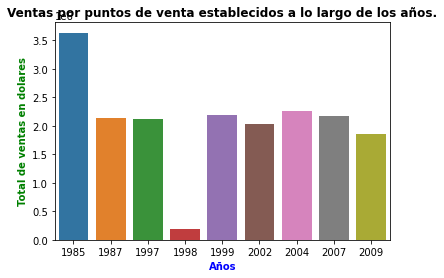

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
total_ventas=df.groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].sum()       #plotting for sales in the years of establishment
X1_sales=total_ventas.index
Y1_sales=total_ventas.values

sns.barplot(X1_sales, Y1_sales)
plt.title('Ventas por puntos de venta establecidos a lo largo de los años.',c='black',weight='bold')
plt.ylabel('Total de ventas en dolares', c='green',weight='bold')
plt.xlabel('Años', c='blue',weight='bold');




**a lo largo de 1985 fue donde mas ventas se presentaron**

Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

Text(0.5, 0, 'Item Fat Content')

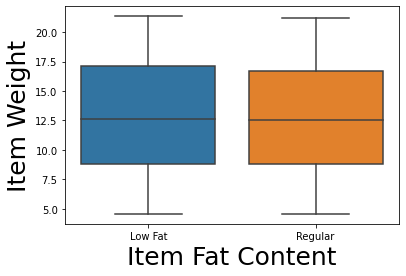

In [16]:
sns.boxplot(x='Item_Fat_Content', y='Item_Weight', data=df)
plt.ylabel('Item Weight', size=25)
plt.xlabel('Item Fat Content', size=25)



podemos encontrar que mientras mas peso tenga el producto mayor es su indice de grasa.

**Mapa de calor de la correlación entre las características.**

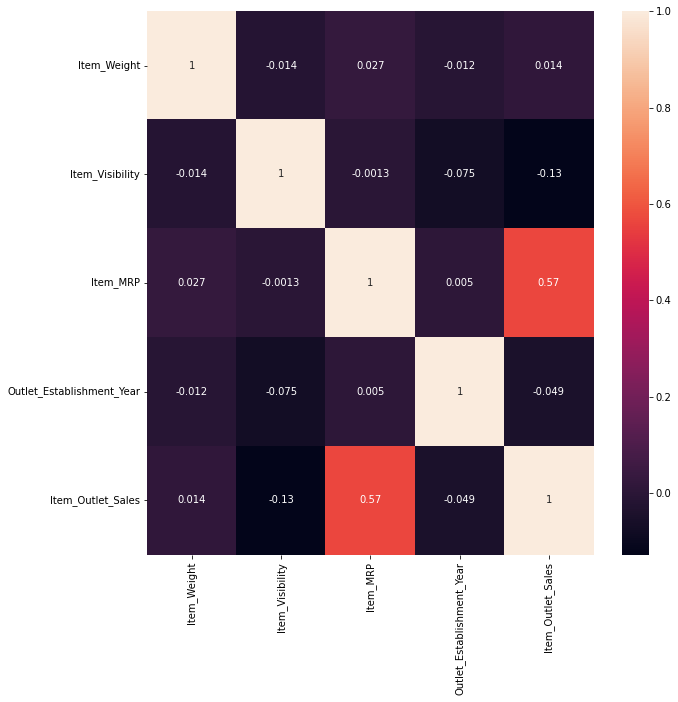

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)


• Creen un mínimo de dos visualizaciones de datos para ayudar a otros comprender las tendencias en los datos (análisis de datos explicativos).

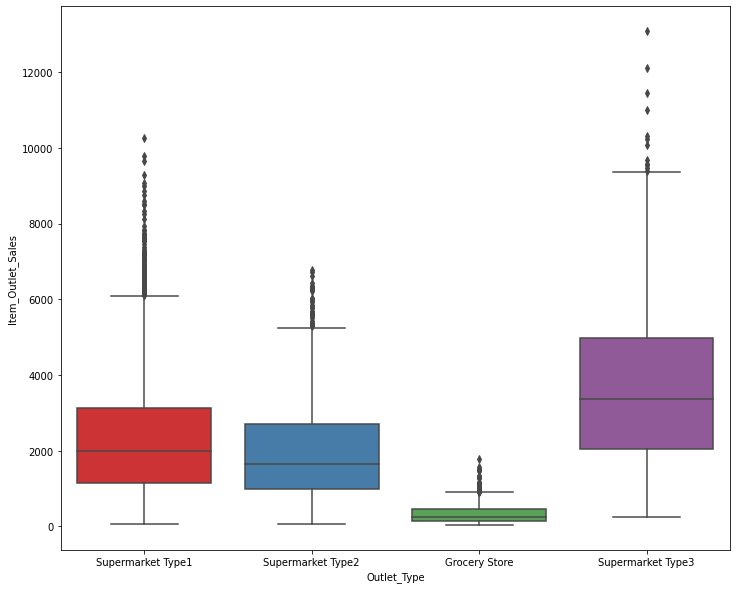

In [12]:
plt.figure(figsize = (12,10))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df,palette="Set1")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Item_Type')

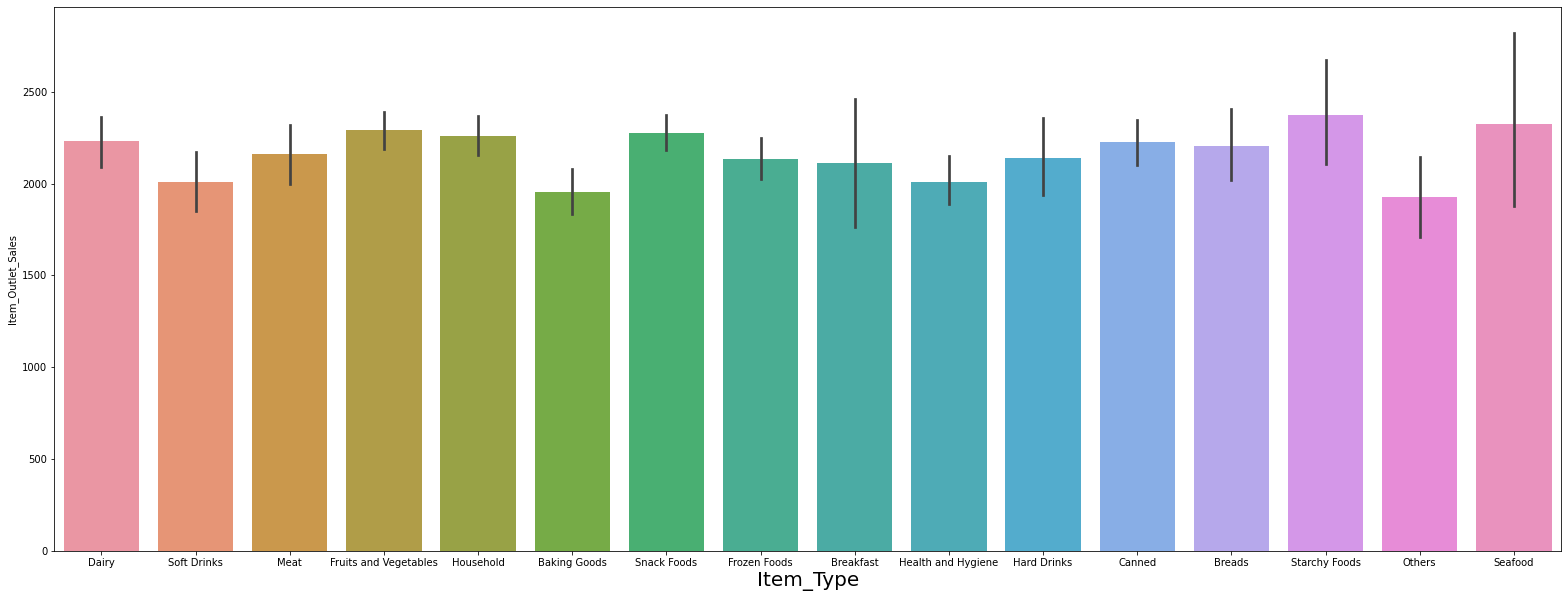

In [18]:
plt.figure(figsize=(27,10))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=df)
plt.xlabel('Item_Type', fontsize=20)